In [ ]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import numpy as np
import seaborn as sns

In [ ]:
# function to find average
def average_list(values):
    total = 0
    for i in range(0, len(values)):
        total += values[i]
    return total / len(values)

In [ ]:
# function to plot class levels beginning and end
def lineplot_beg_to_end_class(q, sophBeg, sophEnd, jrBeg, jrEnd, srBeg, srEnd, band_factor=1):
    # calculate averages
    sophAvgBeg = np.mean(sophBeg)
    sophAvgEnd = np.mean(sophEnd)
    jrAvgBeg = np.mean(jrBeg)
    jrAvgEnd = np.mean(jrEnd)
    srAvgBeg = np.mean(srBeg)
    srAvgEnd = np.mean(srEnd)

    # calculate standard deviations
    sophSTDBeg = np.std(sophBeg, ddof=1) if len(sophBeg) > 1 else 0
    sophSTDEnd = np.std(sophEnd, ddof=1) if len(sophEnd) > 1 else 0
    jrSTDBeg = np.std(jrBeg, ddof=1) if len(jrBeg) > 1 else 0
    jrSTDEnd = np.std(jrEnd, ddof=1) if len(jrEnd) > 1 else 0
    srSTDBeg = np.std(srBeg, ddof=1) if len(srBeg) > 1 else 0
    srSTDEnd = np.std(srEnd, ddof=1) if len(srEnd) > 1 else 0

    # dataframe for plotting
    dfSoph = pd.DataFrame({"x": [0, 1], "y": [sophAvgBeg, sophAvgEnd]})
    sd_overallSoph = np.asarray([sophSTDBeg, sophSTDEnd], dtype=float)

    dfJr = pd.DataFrame({"x": [0, 1], "y": [jrAvgBeg, jrAvgEnd]})
    sd_overallJr = np.asarray([jrSTDBeg, jrSTDEnd], dtype=float)

    dfSr = pd.DataFrame({"x": [0, 1], "y": [srAvgBeg, srAvgEnd]})
    sd_overallSr = np.asarray([srSTDBeg, srSTDEnd], dtype=float)

    # one plot
    plt.figure(figsize=(6,4))

    # Sophomore line + band
    sns.lineplot(data=dfSoph, x="x", y="y", marker="o", color="blue", label="Sophomore")
    x_o, y_o = dfSoph["x"].to_numpy(dtype=float), dfSoph["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallSoph, y_o + band_factor*sd_overallSoph,
                     alpha=0.2, color="blue")

    # Junior line + band
    sns.lineplot(data=dfJr, x="x", y="y", marker="o", color="orange", label="Junior")
    x_o, y_o = dfJr["x"].to_numpy(dtype=float), dfJr["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallJr, y_o + band_factor*sd_overallJr,
                     alpha=0.2, color="orange")

    # Senior line + band
    sns.lineplot(data=dfSr, x="x", y="y", marker="o", color="green", label="Senior")
    x_o, y_o = dfSr["x"].to_numpy(dtype=float), dfSr["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallSr, y_o + band_factor*sd_overallSr,
                     alpha=0.2, color="green")

    # plots graph
    plt.xticks([0, 1], ["Beginning", "End"])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to create graphs for sophs vs jrs vs srs
def lineplot_class(q, sophs, jrs, srs, band_factor=1):

    # calculates averages and standard deviations
    avg_sophs = np.mean(sophs)
    avg_jrs = np.mean(jrs)
    avg_srs = np.mean(srs)
    std_sophs = np.std(sophs, ddof=1)
    std_jrs = np.std(jrs, ddof=1)
    std_srs = np.std(srs, ddof=1)

    # x-axis points
    x = np.linspace(0, 1, 50)  # span entire axis

    plt.figure(figsize=(6,4))

    # Sophomore band and lineplot
    plt.plot(x, [avg_sophs]*len(x), color="blue", label="Sophomores")
    plt.fill_between(x,
                     [avg_sophs - band_factor*std_sophs]*len(x),
                     [avg_sophs + band_factor*std_sophs]*len(x),
                     alpha=0.2, color="blue")

    # Junior band and lineplot
    plt.plot(x, [avg_jrs]*len(x), color="orange", label="Juniors")
    plt.fill_between(x,
                     [avg_jrs - band_factor*std_jrs]*len(x),
                     [avg_jrs + band_factor*std_jrs]*len(x),
                     alpha=0.2, color="orange")

    # Senior band and lineplot
    plt.plot(x, [avg_srs]*len(x), color="green", label="Seniors")
    plt.fill_between(x,
                     [avg_srs - band_factor*std_srs]*len(x),
                     [avg_srs + band_factor*std_srs]*len(x),
                     alpha=0.2, color="green")

    # graphs
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Class Standing")
    plt.title(f"{q}: Sophomores vs Juniors vs Seniors")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to create graphs for beginning vs end
def lineplot_overall_separate(q, begOverall, endOverall, band_factor=1):

    # calculates averages and standard deviations
    avg_beg = np.mean(begOverall)
    avg_end = np.mean(endOverall)
    std_beg = np.std(begOverall, ddof=1)
    std_end = np.std(endOverall, ddof=1)

    # x-axis points
    x = np.linspace(0, 1, 50)  # span entire axis

    plt.figure(figsize=(6,4))

    # Beginning line + shaded region
    plt.plot(x, [avg_beg]*len(x), color="blue", label="Beginning")
    plt.fill_between(x,
                     [avg_beg - band_factor*std_beg]*len(x),
                     [avg_beg + band_factor*std_beg]*len(x),
                     alpha=0.2, color="blue")

    # End line + shaded region
    plt.plot(x, [avg_end]*len(x), color="red", label="End")
    plt.fill_between(x,
                     [avg_end - band_factor*std_end]*len(x),
                     [avg_end + band_factor*std_end]*len(x),
                     alpha=0.2, color="red")

    # graphs
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot single value beginning vs end
def lineplot_beg_to_end(q, begOverall, endOverall, band_factor=1):

    # calculates average
    overallAvgBEG = np.mean(begOverall)
    overallAvgEND = np.mean(endOverall)

    # calculates standard deviations
    overallSTD_BE = np.std(begOverall, ddof=1)
    overallSTD_END= np.std(endOverall, ddof=1)

    # dataframe for value
    dfo = pd.DataFrame({"x": [0, 1], "y": [overallAvgBEG, overallAvgEND]})
    sd_overall = np.asarray([overallSTD_BE, overallSTD_END], dtype=float)

    # plots graph
    plt.figure(figsize=(6,4))
    sns.lineplot(data=dfo, x="x", y="y", marker="o", color="black")

    x_o, y_o = dfo["x"].to_numpy(dtype=float), dfo["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overall, y_o + band_factor*sd_overall,
                     alpha=0.2, color="gray")

    plt.xticks([0, 1], ["Beginning", "End"])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End (Overall)")
    plt.tight_layout()
    plt.show()

In [ ]:
# function to add a column for gender
def map_gender(val):
    responses = str(val).split(",")

    cleaned_responses = []

    for r in responses:
        cleaned_responses.append(r.strip().lower())

    for response in cleaned_responses:
        if "female" in response:
            return "Female"
        elif "male" in response:
            return "Male"
        elif "man" in response:
            return "Male"
        elif "woman" in response:
            return "Female"
        elif "f" in response:
            return "Female"
        elif "women" in response:
            return "Female"


    return "Other"

In [ ]:
# function to add a column for class standing
def map_class_standing(val):
    responses = str(val).split(",")

    if "3" in responses:
        return "Sophomore"
    elif "4" in responses:
        return "Junior"
    elif "5" in responses:
        return "Senior"
    else:
        return None


In [ ]:
# function to use Mann whitney test
def UTest(data1, data2):
    u_value, p_value = mannwhitneyu(data1, data2)

    print(f"Mann-Whitney U-Value: {u_value}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists")

In [ ]:
# function to use Kruskal-Wallis test
def kruskalTest(data1, data2, data3):
    h_stat, p_value = kruskal(data1, data2, data3)

    print(f"Kruskal-Wallis H-Statistic: {h_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists")

In [ ]:
# reads file
data = pd.read_excel('updateDataset.xlsx', header = 1)

In [ ]:
# calls function to create new column for gender
data["Gender"] = data["Q24"].apply(map_gender)

In [ ]:
# calls function to create new column for class standing
data["Class Standing Label"] = data["Q27"].apply(map_class_standing)

In [ ]:
# drops first empty row
data = data.drop(index=0)

In [ ]:
# prints first 5 rows
data.head()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender,Class Standing Label
1,2022-12-01 17:33:00,2022-12-01 17:36:48,End,Student 1,4.0,NaN,male,5,5.0,5.0,...,2.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,Male,Senior
2,2022-10-05 11:22:17,2022-10-05 11:25:34,Beginning,Student 1,8.0,NaN,Male,5,5.0,5.0,...,3.0,3.0,3.0,3.0,5.0,3.0,NaN,NaN,Male,Senior
3,2022-12-03 16:03:10,2022-12-03 16:07:19,End,Student 2,9.0,middle eastern,male,5,NaN,NaN,...,4.0,5.0,5.0,5.0,5.0,3.0,NaN,NaN,Male,Senior
4,2022-10-05 11:33:24,2022-10-05 11:42:06,Beginning,Student 2,9.0,Middle Eastern,Man,5,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,Male,Senior
5,2022-11-30 07:26:53,2022-11-30 07:28:56,End,Student 3,7.0,NaN,Male,"5,6",NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Male,Senior


In [ ]:
# prints last 5 rows
data.tail()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender,Class Standing Label
137,2022-11-30 16:37:44,2022-11-30 16:59:54,End,Student 83,7.0,NaN,Male,5,3.0,3.0,...,3.0,3.0,3.0,3.0,4.0,2.0,2.0,NaN,Male,Senior
138,2022-10-05 15:10:21,2022-10-05 15:18:09,Beginning,Student 84,7.0,NaN,male,2,4.0,4.0,...,3.0,2.0,3.0,3.0,4.0,3.0,NaN,NaN,Male,None
139,2022-10-05 11:25:32,2022-10-05 11:27:47,Beginning,Student 85,8.0,NaN,Male,2,4.0,4.0,...,5.0,5.0,3.0,3.0,5.0,3.0,NaN,NaN,Male,None
140,2022-12-01 00:44:14,2022-12-01 00:48:28,End,Student 86,3.0,NaN,Female,2,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,None
141,2022-12-01 00:50:01,2022-12-01 00:55:38,End,Student 87,3.0,NaN,Female,2,3.0,5.0,...,3.0,5.0,3.0,3.0,5.0,3.0,NaN,NaN,Female,None


In [ ]:
# describes data
data.describe()

,EndDate,Q23,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,...,Q26_5,Q26_6,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14
count,139,138.000000,113.000000,114.000000,114.000000,114.000000,114.000000,113.000000,114.000000,113.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,106.000000,107.000000,37.000000
mean,2022-11-04 07:12:59.258992896,5.355072,3.840708,4.228070,4.105263,4.052632,4.166667,4.168142,4.157895,4.194690,...,4.663551,3.588785,3.906542,3.074766,4.018692,3.392523,3.046729,4.669811,2.962617,2.918919
min,2022-10-05 11:25:34,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,2022-10-06 13:20:54,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,2022-10-24 19:22:35,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,2022-11-30 12:50:32.500000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.000000,4.500000,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,3.000000
max,2022-12-10 00:45:04,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,2.164075,0.950248,0.862545,0.915630,0.939234,0.786126,0.844125,0.878242,0.800205,...,0.565417,1.089861,0.830239,0.987669,0.879336,1.052912,1.003608,0.580996,0.920677,1.010456


In [ ]:
# dataframe for only double responses
double_responses = data.head(104)

In [ ]:
# prints double responses first 5 rows
double_responses.head()


,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender,Class Standing Label
1,2022-12-01 17:33:00,2022-12-01 17:36:48,End,Student 1,4.0,NaN,male,5,5.0,5.0,...,2.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,Male,Senior
2,2022-10-05 11:22:17,2022-10-05 11:25:34,Beginning,Student 1,8.0,NaN,Male,5,5.0,5.0,...,3.0,3.0,3.0,3.0,5.0,3.0,NaN,NaN,Male,Senior
3,2022-12-03 16:03:10,2022-12-03 16:07:19,End,Student 2,9.0,middle eastern,male,5,NaN,NaN,...,4.0,5.0,5.0,5.0,5.0,3.0,NaN,NaN,Male,Senior
4,2022-10-05 11:33:24,2022-10-05 11:42:06,Beginning,Student 2,9.0,Middle Eastern,Man,5,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,Male,Senior
5,2022-11-30 07:26:53,2022-11-30 07:28:56,End,Student 3,7.0,NaN,Male,"5,6",NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Male,Senior


In [ ]:
# prints double responses last 5 rows
double_responses.tail()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender,Class Standing Label
100,2022-12-04 14:02:00,2022-12-04 14:04:24,End,Student 50,3.0,NaN,Male,"5,2",3.0,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Male,Senior
101,2022-10-24 19:29:01,2022-10-24 19:34:44,Beginning,Student 51,4.0,NaN,Male,3,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Sophomore
102,2022-11-29 23:11:07,2022-11-29 23:14:29,End,Student 51,4.0,NaN,Male,3,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,Male,Sophomore
103,2022-12-02 10:44:29,2022-12-02 10:46:41,End,Student 52,7.0,NaN,Male,5,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,Male,Senior
104,2022-10-05 13:14:23,2022-10-05 13:34:31,Beginning,Student 52,7.0,NaN,Male,5,4.0,3.0,...,2.0,4.0,1.0,1.0,4.0,1.0,NaN,NaN,Male,Senior


In [ ]:
# describes data for double responses
double_responses.describe()

,EndDate,Q23,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,...,Q26_5,Q26_6,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14
count,104,104.000000,82.000000,83.000000,83.000000,83.000000,83.000000,82.000000,83.000000,82.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,25.000000
mean,2022-11-05 08:03:24.086538496,5.509615,3.926829,4.289157,4.168675,4.120482,4.192771,4.219512,4.228916,4.268293,...,4.653846,3.653846,3.846154,3.141026,3.987179,3.397436,3.064103,4.692308,3.051282,3.080000
min,2022-10-05 11:25:34,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,2022-10-06 14:10:39.500000,4.000000,3.000000,4.000000,4.000000,3.500000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,5.000000,3.000000,3.000000
50%,2022-11-11 21:26:03.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,2022-11-30 11:42:51,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.750000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,2022-12-10 00:45:04,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,2.220798,0.991077,0.773496,0.921548,0.942203,0.772355,0.861013,0.860024,0.737844,...,0.577206,1.102853,0.838628,0.935926,0.860287,1.085198,1.036224,0.587924,0.952065,1.037625


In [ ]:
# START OF QUESTION 3

In [ ]:
# overall grouped by beginning vs end

# single & double responses responses
begQ3overallALL = []
for i in range(1, 12):
    values = data[(data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3overallALL.extend(values)

endQ3overallALL = []
for i in range(1, 12):
    values = data[(data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3overallALL.extend(values)


# double responses
begQ3overallDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3overallDOUBLE.extend(values)

endQ3overallDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3overallDOUBLE.extend(values)

# tests overall beg vs end
print("All Responses:")
UTest(begQ3overallALL, endQ3overallALL)

print("\nDouble Responses:")
UTest(begQ3overallDOUBLE, endQ3overallDOUBLE)

All Responses:
Mann-Whitney U-Value: 198294.0
P-value: 0.5354630264042732
Fail to reject the null hypothesis: No significant differences exists

Double Responses:
Mann-Whitney U-Value: 110552.0
P-value: 0.05604918046126819
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# question 3 overall gender analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 3 Overall")
print("Averages:")
print("Single & Double Responses by Gender:")

# Female Q3 Data
femaleData_Q3_all = data[data["Gender"] == "Female"]
q3sum_female_all = 0
for i in range (1, 12):
    q3sum_female_all += femaleData_Q3_all["Q3_" + str(i)].mean()
print(f"Female Q3: {q3sum_female_all / 11}")

# Male Q3 Data
maleData_Q3_all = data[data["Gender"] == "Male"]
q3sum_male_all = 0
for i in range (1, 12):
    q3sum_male_all += maleData_Q3_all["Q3_" + str(i)].mean()
print(f"Male Q3: {q3sum_male_all / 11}")

# Other Q3 Data
otherData_Q3_all = data[data["Gender"] == "Other"]
q3sum_other_all = 0
for i in range (1, 12):
    q3sum_other_all += otherData_Q3_all["Q3_" + str(i)].mean()
print(f"Other Q3: {q3sum_other_all / 11} \n")


# DOUBLE RESPONSES
print("Double Responses by Gender:")

# Female Q3 Data
femaleData_Q3_double = double_responses[double_responses["Gender"] == "Female"]
q3sum_female_double = 0
for i in range (1, 12):
    q3sum_female_double += femaleData_Q3_double["Q3_" + str(i)].mean()
print(f"Female Q3: {q3sum_female_double / 11}")

# Male Q3 Data
maleData_Q3_double = double_responses[double_responses["Gender"] == "Male"]
q3sum_male_double = 0
for i in range (1, 12):
    q3sum_male_double += maleData_Q3_double["Q3_" + str(i)].mean()
print(f"Male Q3: {q3sum_male_double / 11} \n")




# U-TEST USING BOTH SINGLE & DOUBLE RESPONSES (gender)
print("\nU-Tests")
print("All Responses (Gender)")
q3femaleALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    q3femaleALL.extend(values)

q3maleALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    q3maleALL.extend(values)

q3otherALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    q3otherALL.extend(values)


UTest(q3femaleALL, q3maleALL)


# U-TEST USING DOUBLE RESPONSES (gender)
print("\nDouble Responses (Gender):")
q3femaleDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    q3femaleDOUBLE.extend(values)

q3maleDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    q3maleDOUBLE.extend(values)

UTest(q3femaleDOUBLE, q3maleDOUBLE)

Question 3 Overall
Averages:
Single & Double Responses by Gender:
Female Q3: 4.141408802613876
Male Q3: 4.066844919786096
Other Q3: 3.6818181818181817 

Double Responses by Gender:
Female Q3: 4.226057365094798
Male Q3: 4.09469696969697 


Kruskal-Wallis Tests
All Responses (Gender)
Mann-Whitney U-Value: 29282.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Gender):
Mann-Whitney U-Value: 17484.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3 comparing genders beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")

begQ3femaleALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3femaleALL.extend(values)

endQ3femaleALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3femaleALL.extend(values)

UTest(endQ3femaleALL, endQ3femaleALL)


# Kruskal Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ3maleALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3maleALL.extend(values)

endQ3maleALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3maleALL.extend(values)

UTest(begQ3maleALL, endQ3maleALL)


# Kruskal Test comparing Other beginning vs end
print("\nOther Beginning vs. End")
begQ3otherALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3otherALL.extend(values)

endQ3otherALL = []
for i in range(1, 12):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3otherALL.extend(values)

UTest(begQ3otherALL, endQ3otherALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# Kruskal Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")
begQ3femaleDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3femaleDOUBLE.extend(values)

endQ3femaleDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3femaleDOUBLE.extend(values)

UTest(begQ3femaleDOUBLE, endQ3femaleDOUBLE)


# Kruskal Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ3maleDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3maleDOUBLE.extend(values)

endQ3maleDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3maleDOUBLE.extend(values)

UTest(begQ3maleDOUBLE, endQ3maleDOUBLE)

Single & Double Responses

Females Beginning vs. End
Mann-Whitney U-Value: 28800.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 70807.0
P-value: 0.5034553973122342
Fail to reject the null hypothesis: No significant differences exists

Other Beginning vs. End
Mann-Whitney U-Value: 2.0
P-value: 9.40782639837979e-05
Reject the null hypothesis: Significant differences exists

Double Responses:

Females Beginning vs. End
Mann-Whitney U-Value: 17968.5
P-value: 0.4852734864746614
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 38718.0
P-value: 0.01655342980587455
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q3 comparing all genders in the beginning & all genders in the end
# comparing all genders beginning (all)
print("Q3 All Genders Beginning - All Responses")
UTest(begQ3femaleALL, begQ3maleALL)

# comparing all genders end (all)
print("\nQ3 All Genders End - All Responses")
UTest(endQ3femaleALL, endQ3maleALL)




# comparing all genders beginning (double)
print("\nQ3 All Genders Beginning - Double Responses")
UTest(begQ3femaleDOUBLE, begQ3maleDOUBLE)

# comparing all genders end (all)
print("\nQ3 All Genders End - Double Responses")
UTest(endQ3femaleDOUBLE, endQ3maleDOUBLE)

Q3 All Genders Beginning - All Responses
Mann-Whitney U-Value: 53628.5
P-value: 0.16562340206904436
Fail to reject the null hypothesis: No significant differences exists

Q3 All Genders End - All Responses
Mann-Whitney U-Value: 40322.5
P-value: 0.6928180568035572
Fail to reject the null hypothesis: No significant differences exists

Q3 All Genders Beginning - Double Responses
Mann-Whitney U-Value: 26815.0
P-value: 0.3969968089064979
Fail to reject the null hypothesis: No significant differences exists

Q3 All Genders End - Double Responses
Mann-Whitney U-Value: 26072.0
P-value: 0.03013460584258469
Reject the null hypothesis: Significant differences exists


In [ ]:
# question 3 overall class analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 3 Overall Analysis (Class Level):")
print("Averages:")
print("Single & Double Responses by Class Level:")

# Juniors Q3 Data
jrData_Q3 = data[data["Class Standing Label"] == "Junior"]
q3sum_jr = 0
for i in range (1, 12):
    q3sum_jr += jrData_Q3["Q3_" + str(i)].mean()
print(f"Juniors Q3: {q3sum_jr / 11}")

# Seniors Q3 Data
srData_Q3 = data[data["Class Standing Label"] == "Senior"]
q3sum_sr = 0
for i in range (1, 12):
    q3sum_sr += srData_Q3["Q3_" + str(i)].mean()
print(f"Seniors Q3: {q3sum_sr / 11}")

# Sophomores Q3 Data
soData_Q3 = data[data["Class Standing Label"] == "Sophomore"]
q3sum_so = 0
for i in range (1, 12):
    q3sum_so += soData_Q3["Q3_" + str(i)].mean()
print(f"Sophomores Q3: {q3sum_so / 11} \n")

# DOUBLE RESPONSES
print("Double Responses by Class Level:")

# Juniors Q3 Data
jrData_Q3 = double_responses[double_responses["Class Standing Label"] == "Junior"]
q3sum_jr = 0
for i in range (1, 12):
    q3sum_jr += jrData_Q3["Q3_" + str(i)].mean()
print(f"Juniors Q3: {q3sum_jr / 11}")

# Seniors Q3 Data
srData_Q3 = double_responses[double_responses["Class Standing Label"] == "Senior"]
q3sum_sr = 0
for i in range (1, 12):
    q3sum_sr += srData_Q3["Q3_" + str(i)].mean()
print(f"Seniors Q3: {q3sum_sr / 11}")

# Sophomores Q3 Data
soData_Q3 = double_responses[double_responses["Class Standing Label"] == "Sophomore"]
q3sum_so = 0
for i in range (1, 12):
    q3sum_so += soData_Q3["Q3_" + str(i)].mean()
print(f"Sophomores Q3: {q3sum_so / 11}")




# KRUSKAL-WALLIS TEST USING BOTH SINGLE & DOUBLE RESPONSES (class)
print()
print("Kruskal-Wallis Tests")
print("All Responses (Class Standing)")
q3jrALL = []
for i in range(1, 12):
    values = data[data["Class Standing Label"] == "Junior"]["Q3_" + str(i)].dropna()
    q3jrALL.extend(values)

q3srALL = []
for i in range(1, 12):
    values = data[data["Class Standing Label"] == "Senior"]["Q3_" + str(i)].dropna()
    q3srALL.extend(values)

q3osorALL = []
for i in range(1, 12):
    values = data[data["Class Standing Label"] == "Sophomore"]["Q3_" + str(i)].dropna()
    q3osorALL.extend(values)

kruskalTest(q3jrALL, q3srALL, q3osorALL)


# KRUSKAL-WALLIS TEST USING DOUBLE RESPONSES (class)
print("\nDouble Responses (Gender):")
q3jrDOUBLE = []
for i in range(1, 12):
    values = double_responses[double_responses["Class Standing Label"] == "Junior"]["Q3_" + str(i)].dropna()
    q3jrDOUBLE.extend(values)

q3srDOUBLE = []
for i in range(1, 12):
    values = double_responses[double_responses["Class Standing Label"] == "Senior"]["Q3_" + str(i)].dropna()
    q3srDOUBLE.extend(values)

q3soDOUBLE = []
for i in range(1, 12):
    values = double_responses[double_responses["Class Standing Label"] == "Sophomore"]["Q3_" + str(i)].dropna()
    q3soDOUBLE.extend(values)

kruskalTest(q3jrDOUBLE, q3srDOUBLE, q3soDOUBLE)

Question 3 Overall Analysis (Class Level):
Averages:
Single & Double Responses by Class Level:
Juniors Q3: 3.9818181818181824
Seniors Q3: 4.073172282263191
Sophomores Q3: 4.122727272727273 

Double Responses by Class Level:
Juniors Q3: 4.20909090909091
Seniors Q3: 4.101317523056654
Sophomores Q3: 4.143540669856459

Kruskal-Wallis Tests
All Responses (Class Standing)
Kruskal-Wallis H-Statistic: 0.5559790135794461
P-value: 0.7573047680308179
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Gender):
Kruskal-Wallis H-Statistic: 0.7546840428346455
P-value: 0.6856815160224564
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3 comparing class label beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ3juniorALL = []
for i in range(1, 12):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3juniorALL.extend(values)

endQ3juniorALL = []
for i in range(1, 12):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3juniorALL.extend(values)

UTest(begQ3juniorALL, endQ3juniorALL)


# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ3seniorALL = []
for i in range(1, 12):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3seniorALL.extend(values)

endQ3seniorALL = []
for i in range(1, 12):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3seniorALL.extend(values)

UTest(begQ3seniorALL, endQ3seniorALL)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ3sophomoreALL = []
for i in range(1, 12):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3sophomoreALL.extend(values)

endQ3sophomoreALL = []
for i in range(1, 12):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3sophomoreALL.extend(values)

UTest(begQ3sophomoreALL, endQ3sophomoreALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ3juniorDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3juniorDOUBLE.extend(values)

endQ3juniorDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3juniorDOUBLE.extend(values)

UTest(begQ3juniorDOUBLE, endQ3juniorDOUBLE)

# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ3seniorDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3seniorDOUBLE.extend(values)

endQ3seniorDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3seniorDOUBLE.extend(values)

UTest(begQ3seniorDOUBLE, endQ3seniorDOUBLE)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ3sophomoreDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "Beginning")][f"Q3_{i}"].dropna().tolist()

    begQ3sophomoreDOUBLE.extend(values)

endQ3sophomoreDOUBLE = []
for i in range(1, 12):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "End")][f"Q3_{i}"].dropna().tolist()

    endQ3sophomoreDOUBLE.extend(values)

UTest(begQ3sophomoreDOUBLE, endQ3sophomoreDOUBLE)

Single & Double Responses
Juniors Beginning vs. End
Mann-Whitney U-Value: 3021.0
P-value: 0.20351857852576016
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 71559.5
P-value: 0.0056788408154273325
Reject the null hypothesis: Significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 6487.5
P-value: 0.25361918533802186
Fail to reject the null hypothesis: No significant differences exists

Double Responses:
Juniors Beginning vs. End
Mann-Whitney U-Value: 1962.5
P-value: 0.0007457648624115031
Reject the null hypothesis: Significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 34553.0
P-value: 0.035496567749413226
Reject the null hypothesis: Significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 6085.5
P-value: 0.11380124548973657
Fail to reject the null hypothesis: No significant differences exists


Mean Q3 Beg: 4.167272727272727
Mean Q3 End: 4.021929824561403
0.9308948862552626
0.9292761540650898


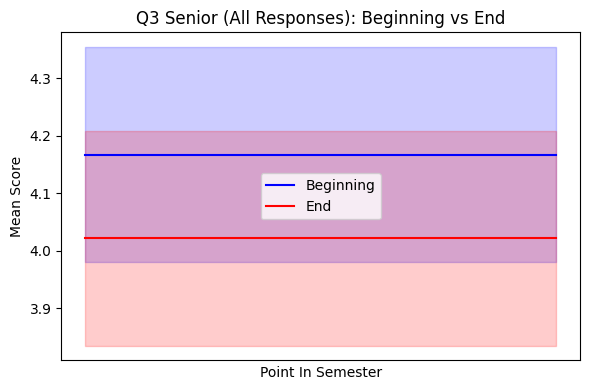

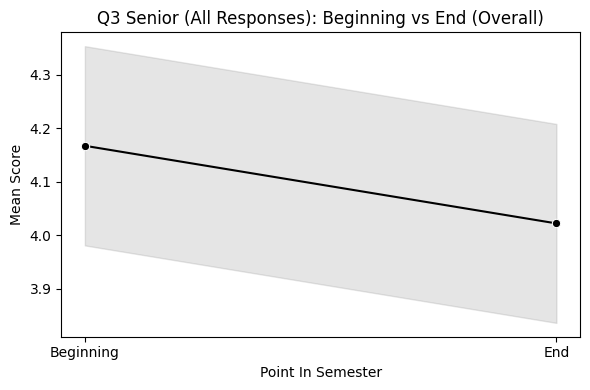

In [ ]:
# graphs and prints averages and standard deviation of seniors beginning vs end
Q3SeniorBegAvgDOUBLE = average_list(begQ3seniorDOUBLE)
Q3SeniorEndAvgDOUBLE = average_list(endQ3seniorDOUBLE)

Q3SeniorBEGSTD = np.std(begQ3seniorDOUBLE)
Q3SeniorENDSTD = np.std(endQ3seniorDOUBLE)

print(f"Mean Q3 Beg: {Q3SeniorBegAvgDOUBLE}")
print(f"Mean Q3 End: {Q3SeniorEndAvgDOUBLE}")
print(Q3SeniorBEGSTD)
print(Q3SeniorENDSTD)

lineplot_overall_separate("Q3 Senior (All Responses)",
    begOverall=begQ3seniorDOUBLE,
    endOverall=endQ3seniorDOUBLE, band_factor=0.20
)

lineplot_beg_to_end("Q3 Senior (All Responses)",
    begOverall=begQ3seniorDOUBLE,
    endOverall=endQ3seniorDOUBLE,
    band_factor=0.2
)

Mean Q3 Beg: 4.167272727272727
Mean Q3 End: 4.021929824561403
0.9308948862552626
0.9292761540650898


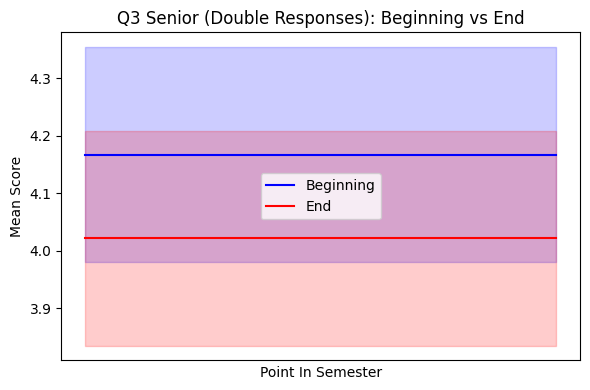

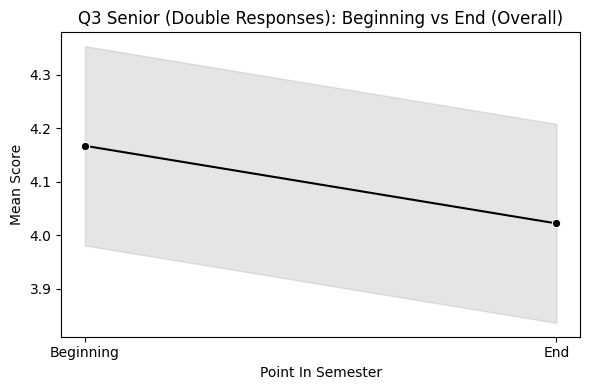

In [ ]:
# graphs and prints seniors beginning vs end (double responses)
Q3SeniorBegAvgDOUBLE = average_list(begQ3seniorDOUBLE)
Q3SeniorEndAvgDOUBLE = average_list(endQ3seniorDOUBLE)

Q3SeniorBEGSTD = np.std(begQ3seniorDOUBLE)
Q3SeniorENDSTD = np.std(endQ3seniorDOUBLE)

print(f"Mean Q3 Beg: {Q3SeniorBegAvgDOUBLE}")
print(f"Mean Q3 End: {Q3SeniorEndAvgDOUBLE}")
print(Q3SeniorBEGSTD)
print(Q3SeniorENDSTD)

lineplot_overall_separate("Q3 Senior (Double Responses)",
    begOverall=begQ3seniorDOUBLE,
    endOverall=endQ3seniorDOUBLE, band_factor=0.20
)

lineplot_beg_to_end("Q3 Senior (Double Responses)",
    begOverall=begQ3seniorDOUBLE,
    endOverall=endQ3seniorDOUBLE,
    band_factor=0.2
)

In [ ]:
# Q3 comparing all class levels in the beginning & all class levels in the end
# comparing all genders beginning (all)
print("Q3 All Class Levels Beginning - All Responses")
kruskalTest(begQ3juniorALL, begQ3seniorALL, begQ3sophomoreALL)

# comparing all genders end (all)
print("\nQ3 All Class Levels End - All Responses")
kruskalTest(endQ3juniorALL, endQ3seniorALL, endQ3sophomoreALL)




# comparing all class levels beginning (double)
print("\nQ3 All Class Levels Beginning - Double Responses")
kruskalTest(begQ3juniorDOUBLE, begQ3seniorDOUBLE, begQ3sophomoreALL)

# comparing all genders end (all)
print("\nQ3 All Class Levels End - Double Responses")
kruskalTest(endQ3juniorDOUBLE, endQ3seniorDOUBLE, endQ3sophomoreDOUBLE)

Q3 All Class Levels Beginning - All Responses
Kruskal-Wallis H-Statistic: 4.077402644863869
P-value: 0.1301976859467647
Fail to reject the null hypothesis: No significant differences exists

Q3 All Class Levels End - All Responses
Kruskal-Wallis H-Statistic: 2.126275357589505
P-value: 0.34537044693197805
Fail to reject the null hypothesis: No significant differences exists

Q3 All Class Levels Beginning - Double Responses
Kruskal-Wallis H-Statistic: 6.574065081053017
P-value: 0.03736456287216363
Reject the null hypothesis: Significant differences exists

Q3 All Class Levels End - Double Responses
Kruskal-Wallis H-Statistic: 0.11808172673130607
P-value: 0.9426682477727502
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# START OF QUESTION 6

In [ ]:
# overall grouped by beginning vs end

# single & double responses responses
begQ6overallALL = []
for i in range(1, 16):
    values = data[(data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6overallALL.extend(values)

endQ6overallALL = []
for i in range(1, 16):
    values = data[(data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6overallALL.extend(values)


# double responses
begQ6overallDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6overallDOUBLE.extend(values)

endQ6overallDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6overallDOUBLE.extend(values)

# tests overall beg vs end
print("All Responses:")
UTest(begQ6overallALL, endQ6overallALL)

print("\nDouble Responses:")
UTest(begQ6overallDOUBLE, endQ6overallDOUBLE)

All Responses:
Mann-Whitney U-Value: 309258.5
P-value: 0.0014926739530619296
Reject the null hypothesis: Significant differences exists

Double Responses:
Mann-Whitney U-Value: 189829.0
P-value: 0.009929377903720312
Reject the null hypothesis: Significant differences exists


In [ ]:
# question 6 overall gender analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 6 Overall Analysis:")
print("Averages:")
print("Single & Double Responses by Gender:")

# Female Q6 Data
femaleData_Q6_all = data[data["Gender"] == "Female"]
Q6sum_female_all = 0
for i in range (1, 16):
    Q6sum_female_all += femaleData_Q6_all["Q6_" + str(i)].mean()
print(f"Female Q6: {Q6sum_female_all / 15}")

# Male Q6 Data
maleData_Q6_all = data[data["Gender"] == "Male"]
Q6sum_male_all = 0
for i in range (1, 16):
    Q6sum_male_all += maleData_Q6_all["Q6_" + str(i)].mean()
print(f"Male Q6: {Q6sum_male_all / 15}")

# Other Q6 Data
otherData_Q6_all = data[data["Gender"] == "Other"]
Q6sum_other_all = 0
for i in range (1, 16):
    Q6sum_other_all += otherData_Q6_all["Q6_" + str(i)].mean()
print(f"Other Q6: {Q6sum_other_all / 15} \n")


# DOUBLE RESPONSES
print("Double Responses by Gender:")

# Female Q6 Data
femaleData_Q6_double = double_responses[double_responses["Gender"] == "Female"]
Q6sum_female_double = 0
for i in range (1, 16):
    Q6sum_female_double += femaleData_Q6_double["Q6_" + str(i)].mean()
print(f"Female Q6: {Q6sum_female_double / 15}")

# Male Q6 Data
maleData_Q6_double = double_responses[double_responses["Gender"] == "Male"]
Q6sum_male_double = 0
for i in range (1, 16):
    Q6sum_male_double += maleData_Q6_double["Q6_" + str(i)].mean()
print(f"Male Q6: {Q6sum_male_double / 15} \n")




# KRUSKAL-WALLIS TEST USING BOTH SINGLE & DOUBLE RESPONSES (gender)
print("\nKruskal-Wallis Tests")
print("All Responses (Gender)")
Q6femaleALL = []
for i in range(1, 16):
    values = data[data["Gender"] == "Female"]["Q6_" + str(i)]
    Q6femaleALL.extend(values)

Q6maleALL = []
for i in range(1, 16):
    values = data[data["Gender"] == "Male"]["Q6_" + str(i)]
    Q6maleALL.extend(Q6maleALL)

Q6otherALL = []
for i in range(1, 16):
    values = data[data["Gender"] == "Other"]["Q6_" + str(i)]
    Q6otherALL.extend(values)

UTest(Q6femaleALL, Q6maleALL)


# U-TEST USING DOUBLE RESPONSES (gender)
print("\nDouble Responses (Gender):")
Q6femaleDOUBLE = []
for i in range(1, 16):
    values = double_responses[double_responses["Gender"] == "Female"]["Q6_" + str(i)]
    Q6femaleDOUBLE.extend(values)

Q6maleDOUBLE = []
for i in range(1, 16):
    values = double_responses[double_responses["Gender"] == "Male"]["Q6_" + str(i)]
    Q6maleDOUBLE.extend(Q6maleDOUBLE)


UTest(Q6femaleDOUBLE, Q6maleDOUBLE)

Question 6 Overall Analysis:
Averages:
Single & Double Responses by Gender:
Female Q6: 3.8879432624113472
Male Q6: 3.8072504708097923
Other Q6: 3.5333333333333337 

Double Responses by Gender:
Female Q6: 3.9264957264957263
Male Q6: 3.7869565217391306 


Kruskal-Wallis Tests
All Responses (Gender)
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Gender):
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6 comparing genders beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# Kruskal Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")

begQ6femaleALL = []
for i in range(1, 16):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6femaleALL.extend(values)

endQ6femaleALL = []
for i in range(1, 16):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6femaleALL.extend(values)

UTest(endQ6femaleALL, endQ6femaleALL)


# Kruskal Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ6maleALL = []
for i in range(1, 16):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6maleALL.extend(values)

endQ6maleALL = []
for i in range(1, 16):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6maleALL.extend(values)

UTest(begQ6maleALL, endQ6maleALL)


# Kruskal Test comparing Other beginning vs end
print("\nOther Beginning vs. End")
begQ6otherALL = []
for i in range(1, 16):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6otherALL.extend(values)

endQ6otherALL = []
for i in range(1, 16):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6otherALL.extend(values)

UTest(begQ6otherALL, endQ6otherALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# Kruskal Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")
begQ6femaleDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6femaleDOUBLE.extend(values)

endQ6femaleDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6femaleDOUBLE.extend(values)

UTest(begQ6femaleDOUBLE, endQ6femaleDOUBLE)


# Kruskal Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ6maleDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6maleDOUBLE.extend(values)

endQ6maleDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6maleDOUBLE.extend(values)

UTest(begQ6maleDOUBLE, endQ6maleDOUBLE)


Single & Double Responses

Females Beginning vs. End
Mann-Whitney U-Value: 82012.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 92902.0
P-value: 0.0328510897099049
Reject the null hypothesis: Significant differences exists

Other Beginning vs. End
Mann-Whitney U-Value: 28.5
P-value: 9.053248684638342e-07
Reject the null hypothesis: Significant differences exists

Double Responses:

Females Beginning vs. End
Mann-Whitney U-Value: 40087.0
P-value: 0.3027020790646392
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 54755.5
P-value: 0.06313079925533206
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6 comparing all genders in the beginning & all genders in the end
# comparing all genders beginning (all)
print("Q6 All Genders Beginning - All Responses")
UTest(begQ6femaleALL, begQ6maleALL)

# comparing all genders end (all)
print("\nQ6 All Genders End - All Responses")
UTest(endQ6femaleALL, endQ6maleALL)




# comparing all genders beginning (double)
print("\nQ6 All Genders Beginning - Double Responses")
UTest(begQ6femaleDOUBLE, begQ6maleDOUBLE)

# comparing all genders end (all)
print("\nQ6 All Genders End - Double Responses")
UTest(endQ6femaleDOUBLE, endQ6maleDOUBLE)

Q6 All Genders Beginning - All Responses
Mann-Whitney U-Value: 71985.5
P-value: 0.09492739727939194
Fail to reject the null hypothesis: No significant differences exists

Q6 All Genders End - All Responses
Mann-Whitney U-Value: 93856.5
P-value: 0.39100769921771417
Fail to reject the null hypothesis: No significant differences exists

Q6 All Genders Beginning - Double Responses
Mann-Whitney U-Value: 45829.5
P-value: 0.05337681540494693
Fail to reject the null hypothesis: No significant differences exists

Q6 All Genders End - Double Responses
Mann-Whitney U-Value: 63348.5
P-value: 0.11204513356417757
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6 comparing class label beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ6juniorALL = []
for i in range(1, 16):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6juniorALL.extend(values)

endQ6juniorALL = []
for i in range(1, 16):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6juniorALL.extend(values)

UTest(begQ6juniorALL, endQ6juniorALL)


# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ6seniorALL = []
for i in range(1, 16):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6seniorALL.extend(values)

endQ6seniorALL = []
for i in range(1, 16):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6seniorALL.extend(values)

UTest(begQ6seniorALL, endQ6seniorALL)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ6sophomoreALL = []
for i in range(1, 16):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6sophomoreALL.extend(values)

endQ6sophomoreALL = []
for i in range(1, 16):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6sophomoreALL.extend(values)

UTest(begQ6sophomoreALL, endQ6sophomoreALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ6juniorDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6juniorDOUBLE.extend(values)

endQ6juniorDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6juniorDOUBLE.extend(values)

UTest(begQ6juniorDOUBLE, endQ6juniorDOUBLE)

# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ6seniorDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6seniorDOUBLE.extend(values)

endQ6seniorDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6seniorDOUBLE.extend(values)

UTest(begQ6seniorDOUBLE, endQ6seniorDOUBLE)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ6sophomoreDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "Beginning")][f"Q6_{i}"].dropna().tolist()

    begQ6sophomoreDOUBLE.extend(values)

endQ6sophomoreDOUBLE = []
for i in range(1, 16):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "End")][f"Q6_{i}"].dropna().tolist()

    endQ6sophomoreDOUBLE.extend(values)

UTest(begQ6sophomoreDOUBLE, endQ6sophomoreDOUBLE)

Single & Double Responses
Juniors Beginning vs. End
Mann-Whitney U-Value: 4162.0
P-value: 0.001297121990004954
Reject the null hypothesis: Significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 122208.0
P-value: 0.8806413191202995
Fail to reject the null hypothesis: No significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 6641.5
P-value: 0.00010662655453598017
Reject the null hypothesis: Significant differences exists

Double Responses:
Juniors Beginning vs. End
Mann-Whitney U-Value: 1567.5
P-value: 0.024212586542527427
Reject the null hypothesis: Significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 76405.0
P-value: 0.44615275636465024
Fail to reject the null hypothesis: No significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 5643.0
P-value: 0.0023755555016091254
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q6 comparing all class levels in the beginning & all class levels in the end
# comparing all genders beginning (all)
print("Q6 All Class Levels Beginning - All Responses")
kruskalTest(begQ6juniorALL, begQ6seniorALL, begQ6sophomoreALL)

# comparing all genders end (all)
print("\nQ6 All Class Levels End - All Responses")
kruskalTest(endQ6juniorALL, endQ6seniorALL, endQ6sophomoreALL)




# comparing all class levels beginning (double)
print("\nQ6 All Class Levels Beginning - Double Responses")
kruskalTest(begQ6juniorDOUBLE, begQ6seniorDOUBLE, begQ6sophomoreALL)

# comparing all genders end (all)
print("\nQ6 All Class Levels End - Double Responses")
kruskalTest(endQ6juniorDOUBLE, endQ6seniorDOUBLE, endQ6sophomoreDOUBLE)

Q6 All Class Levels Beginning - All Responses
Kruskal-Wallis H-Statistic: 28.22180156686055
P-value: 7.442411089599795e-07
Reject the null hypothesis: Significant differences exists

Q6 All Class Levels End - All Responses
Kruskal-Wallis H-Statistic: 6.236227762550615
P-value: 0.044240532674606085
Reject the null hypothesis: Significant differences exists

Q6 All Class Levels Beginning - Double Responses
Kruskal-Wallis H-Statistic: 13.966100221139495
P-value: 0.0009274699985619806
Reject the null hypothesis: Significant differences exists

Q6 All Class Levels End - Double Responses
Kruskal-Wallis H-Statistic: 6.45009722107931
P-value: 0.03975384907319487
Reject the null hypothesis: Significant differences exists


Q6: Soph Beginning Avg: 3.56
Q6: Jr Beginning Avg: 3.342857142857143
Q6: Sr Beginning Avg: 3.8836206896551726
1.1283025598954681
1.040408083201893
1.016793808609745


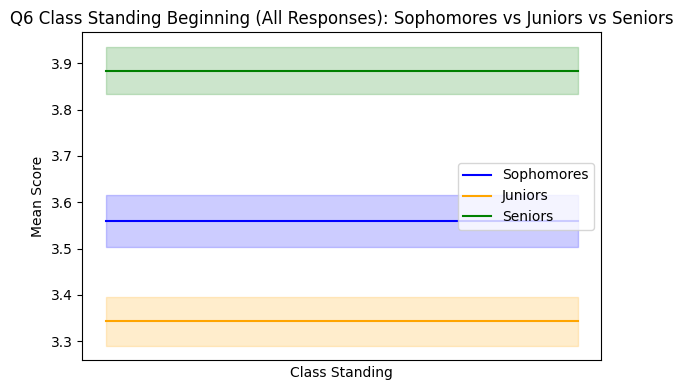

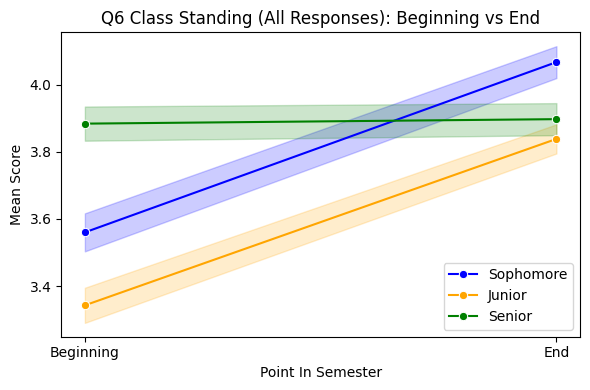

In [ ]:
Q6_sophsAvg   = average_list(begQ6sophomoreALL)
Q6_jrsAvg   = average_list(begQ6juniorALL)
Q6_srsAvg   = average_list(begQ6seniorALL)

Q4_6_sophSTD = np.std(begQ6sophomoreALL)
Q4_6_jrSTD = np.std(begQ6juniorALL)
Q4_6_srSTD = np.std(begQ6seniorALL)


print(f"Q6: Soph Beginning Avg: {Q6_sophsAvg}")
print(f"Q6: Jr Beginning Avg: {Q6_jrsAvg}")
print(f"Q6: Sr Beginning Avg: {Q6_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)

lineplot_class("Q6 Class Standing Beginning (All Responses)", sophs=begQ6sophomoreALL, jrs=begQ6juniorALL, srs=begQ6seniorALL, band_factor=0.05)

lineplot_beg_to_end_class("Q6 Class Standing (All Responses)", begQ6sophomoreALL, endQ6sophomoreALL, begQ6juniorALL, endQ6juniorALL, begQ6seniorALL, endQ6seniorALL, band_factor=0.05)

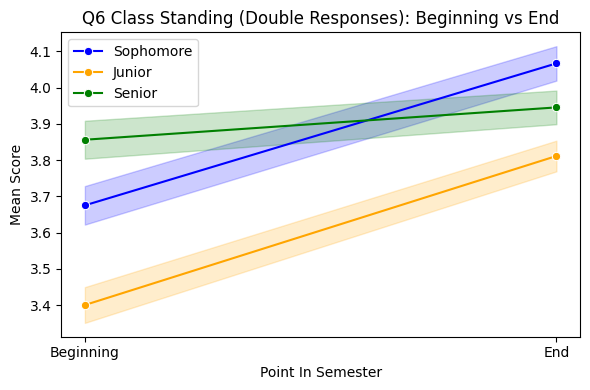

In [ ]:
lineplot_beg_to_end_class("Q6 Class Standing (Double Responses)", begQ6sophomoreDOUBLE, endQ6sophomoreDOUBLE, begQ6juniorDOUBLE, endQ6juniorDOUBLE, begQ6seniorDOUBLE, endQ6seniorDOUBLE, band_factor=0.05)

Q6: Soph Beginning Avg: 3.675
Q6: Jr Beginning Avg: 3.4
Q6: Sr Beginning Avg: 3.856
1.0580051984749415
0.9752492558885195
1.0459114047885063


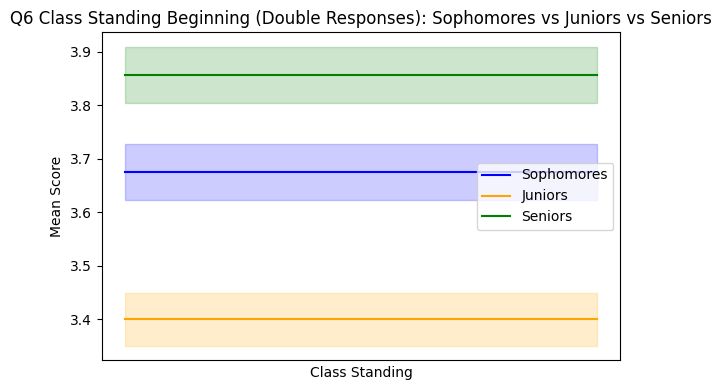

In [ ]:
Q6_sophsAvg   = average_list(begQ6sophomoreDOUBLE)
Q6_jrsAvg   = average_list(begQ6juniorDOUBLE)
Q6_srsAvg   = average_list(begQ6seniorDOUBLE)

Q4_6_sophSTD = np.std(begQ6sophomoreDOUBLE)
Q4_6_jrSTD = np.std(begQ6juniorDOUBLE)
Q4_6_srSTD = np.std(begQ6seniorDOUBLE)


print(f"Q6: Soph Beginning Avg: {Q6_sophsAvg}")
print(f"Q6: Jr Beginning Avg: {Q6_jrsAvg}")
print(f"Q6: Sr Beginning Avg: {Q6_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)

lineplot_class("Q6 Class Standing Beginning (Double Responses)", sophs=begQ6sophomoreDOUBLE, jrs=begQ6juniorDOUBLE, srs=begQ6seniorDOUBLE, band_factor=0.05)

Q6: Soph Beginning Avg: 4.066666666666666
Q6: Jr Beginning Avg: 3.8380952380952382
Q6: Sr Beginning Avg: 3.8969465648854964
0.946337971105226
0.8632586052285455
0.9535341198695386


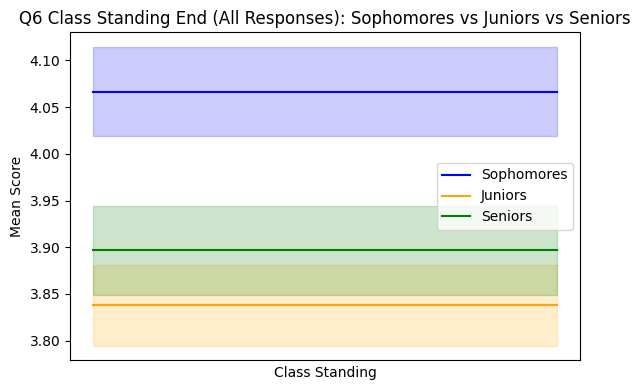

In [ ]:
Q6_sophsAvg   = average_list(endQ6sophomoreALL)
Q6_jrsAvg   = average_list(endQ6juniorALL)
Q6_srsAvg   = average_list(endQ6seniorALL)

Q4_6_sophSTD = np.std(endQ6sophomoreALL)
Q4_6_jrSTD = np.std(endQ6juniorALL)
Q4_6_srSTD = np.std(endQ6seniorALL)


print(f"Q6: Soph Beginning Avg: {Q6_sophsAvg}")
print(f"Q6: Jr Beginning Avg: {Q6_jrsAvg}")
print(f"Q6: Sr Beginning Avg: {Q6_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)

lineplot_class("Q6 Class Standing End (All Responses)", sophs=endQ6sophomoreALL, jrs=endQ6juniorALL, srs=endQ6seniorALL, band_factor=0.05)

Q6: Soph Beginning Avg: 4.066666666666666
Q6: Jr Beginning Avg: 3.811111111111111
Q6: Sr Beginning Avg: 3.9452380952380954
0.946337971105226
0.8418820773117607
0.9280554121778303


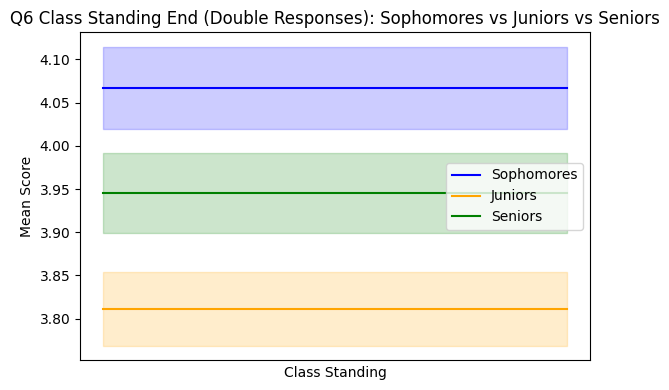

In [ ]:
Q6_sophsAvg   = average_list(endQ6sophomoreDOUBLE)
Q6_jrsAvg   = average_list(endQ6juniorDOUBLE)
Q6_srsAvg   = average_list(endQ6seniorDOUBLE)

Q4_6_sophSTD = np.std(endQ6sophomoreDOUBLE)
Q4_6_jrSTD = np.std(endQ6juniorDOUBLE)
Q4_6_srSTD = np.std(endQ6seniorDOUBLE)


print(f"Q6: Soph Beginning Avg: {Q6_sophsAvg}")
print(f"Q6: Jr Beginning Avg: {Q6_jrsAvg}")
print(f"Q6: Sr Beginning Avg: {Q6_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)

lineplot_class("Q6 Class Standing End (Double Responses)", sophs=endQ6sophomoreDOUBLE, jrs=endQ6juniorDOUBLE, srs=endQ6seniorDOUBLE, band_factor=0.05)

In [ ]:
# START OF QUESTION 5

In [ ]:
# overall grouped by beginning vs end

# single & double responses responses
begQ5overallALL = []
for i in range(1, 14):
    values = data[(data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5overallALL.extend(values)

endQ5overallALL = []
for i in range(1, 14):
    values = data[(data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5overallALL.extend(values)


# double responses
begQ5overallDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5overallDOUBLE.extend(values)

endQ5overallDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5overallDOUBLE.extend(values)

# tests overall beg vs end
print("All Responses:")
UTest(begQ5overallALL, endQ5overallALL)

print("\nDouble Responses:")
UTest(begQ5overallDOUBLE, endQ5overallDOUBLE)

All Responses:
Mann-Whitney U-Value: 216780.5
P-value: 0.00038615509573912437
Reject the null hypothesis: Significant differences exists

Double Responses:
Mann-Whitney U-Value: 127283.0
P-value: 0.014576720008153889
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q5 comparing genders beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")

begQ5femaleALL = []
for i in range(1, 14):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5femaleALL.extend(values)

endQ5femaleALL = []
for i in range(1, 14):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5femaleALL.extend(values)

UTest(endQ5femaleALL, endQ5femaleALL)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ5maleALL = []
for i in range(1, 14):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5maleALL.extend(values)

endQ5maleALL = []
for i in range(1, 14):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5maleALL.extend(values)

UTest(begQ5maleALL, endQ5maleALL)


# U-Test comparing Other beginning vs end
print("\nOther Beginning vs. End")
begQ5otherALL = []
for i in range(1, 14):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5otherALL.extend(values)

endQ5otherALL = []
for i in range(1, 14):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5otherALL.extend(values)

UTest(begQ5otherALL, endQ5otherALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")
begQ5femaleDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5femaleDOUBLE.extend(values)

endQ5femaleDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5femaleDOUBLE.extend(values)

UTest(begQ5femaleDOUBLE, endQ5femaleDOUBLE)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ5maleDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5maleDOUBLE.extend(values)

endQ5maleDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5maleDOUBLE.extend(values)

UTest(begQ5maleDOUBLE, endQ5maleDOUBLE)


Single & Double Responses

Females Beginning vs. End
Mann-Whitney U-Value: 44700.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 60574.5
P-value: 0.04205504905859103
Reject the null hypothesis: Significant differences exists

Other Beginning vs. End
Mann-Whitney U-Value: 103.0
P-value: 0.03383632543608306
Reject the null hypothesis: Significant differences exists

Double Responses:

Females Beginning vs. End
Mann-Whitney U-Value: 28740.5
P-value: 0.03223093620246048
Reject the null hypothesis: Significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 33662.0
P-value: 0.28761312109802206
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5 comparing all genders in the beginning & all genders in the end
# comparing all genders beginning (all)
print("Q5 All Genders Beginning - All Responses")
UTest(begQ5femaleALL, begQ5maleALL)

# comparing all genders end (all)
print("\nQ5 All Genders End - All Responses")
UTest(endQ5femaleALL, endQ5maleALL)




# comparing all genders beginning (double)
print("\nQ5 All Genders Beginning - Double Responses")
UTest(begQ5femaleDOUBLE, begQ5maleDOUBLE)

# comparing all genders end (all)
print("\nQ5 All Genders End - Double Responses")
UTest(endQ5femaleDOUBLE, endQ5maleDOUBLE)

Q5 All Genders Beginning - All Responses
Mann-Whitney U-Value: 56107.5
P-value: 0.24968536885132675
Fail to reject the null hypothesis: No significant differences exists

Q5 All Genders End - All Responses
Mann-Whitney U-Value: 53371.0
P-value: 0.679503539457355
Fail to reject the null hypothesis: No significant differences exists

Q5 All Genders Beginning - Double Responses
Mann-Whitney U-Value: 35556.5
P-value: 0.3483828905447943
Fail to reject the null hypothesis: No significant differences exists

Q5 All Genders End - Double Responses
Mann-Whitney U-Value: 30784.0
P-value: 0.7976160215128238
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5 comparing class label beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ5juniorALL = []
for i in range(1, 14):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5juniorALL.extend(values)

endQ5juniorALL = []
for i in range(1, 14):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5juniorALL.extend(values)

UTest(begQ5juniorALL, endQ5juniorALL)


# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ5seniorALL = []
for i in range(1, 14):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5seniorALL.extend(values)

endQ5seniorALL = []
for i in range(1, 14):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5seniorALL.extend(values)

UTest(begQ5seniorALL, endQ5seniorALL)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ5sophomoreALL = []
for i in range(1, 14):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5sophomoreALL.extend(values)

endQ5sophomoreALL = []
for i in range(1, 14):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5sophomoreALL.extend(values)

UTest(begQ5sophomoreALL, endQ5sophomoreALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ5juniorDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5juniorDOUBLE.extend(values)

endQ5juniorDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5juniorDOUBLE.extend(values)

UTest(begQ5juniorDOUBLE, endQ5juniorDOUBLE)

# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ5seniorDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5seniorDOUBLE.extend(values)

endQ5seniorDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5seniorDOUBLE.extend(values)

UTest(begQ5seniorDOUBLE, endQ5seniorDOUBLE)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ5sophomoreDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "Beginning")][f"Q5_{i}"].dropna().tolist()

    begQ5sophomoreDOUBLE.extend(values)

endQ5sophomoreDOUBLE = []
for i in range(1, 14):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "End")][f"Q5_{i}"].dropna().tolist()

    endQ5sophomoreDOUBLE.extend(values)

UTest(begQ5sophomoreDOUBLE, endQ5sophomoreDOUBLE)

Single & Double Responses
Juniors Beginning vs. End
Mann-Whitney U-Value: 3498.5
P-value: 0.08355560400682957
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 79178.5
P-value: 0.6488203722492135
Fail to reject the null hypothesis: No significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 5290.0
P-value: 0.007347423886772346
Reject the null hypothesis: Significant differences exists

Double Responses:
Juniors Beginning vs. End
Mann-Whitney U-Value: 2076.5
P-value: 0.8044950091433886
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 42729.0
P-value: 0.9502392209292939
Fail to reject the null hypothesis: No significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 4761.0
P-value: 0.006038023861407341
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q5 comparing all class levels in the beginning & all class levels in the end
# comparing all genders beginning (all)
print("Q5 All Class Levels Beginning - All Responses")
kruskalTest(begQ5juniorALL, begQ5seniorALL, begQ5sophomoreALL)

# comparing all genders end (all)
print("\nQ5 All Class Levels End - All Responses")
kruskalTest(endQ5juniorALL, endQ5seniorALL, endQ5sophomoreALL)




# comparing all class levels beginning (double)
print("\nQ5 All Class Levels Beginning - Double Responses")
kruskalTest(begQ5juniorDOUBLE, begQ5seniorDOUBLE, begQ5sophomoreALL)

# comparing all genders end (all)
print("\nQ5 All Class Levels End - Double Responses")
kruskalTest(endQ5juniorDOUBLE, endQ5seniorDOUBLE, endQ5sophomoreDOUBLE)

Q5 All Class Levels Beginning - All Responses
Kruskal-Wallis H-Statistic: 5.137609596823879
P-value: 0.07662707551690556
Fail to reject the null hypothesis: No significant differences exists

Q5 All Class Levels End - All Responses
Kruskal-Wallis H-Statistic: 2.524753319549732
P-value: 0.28298067786227166
Fail to reject the null hypothesis: No significant differences exists

Q5 All Class Levels Beginning - Double Responses
Kruskal-Wallis H-Statistic: 3.1470741961744766
P-value: 0.2073106060405489
Fail to reject the null hypothesis: No significant differences exists

Q5 All Class Levels End - Double Responses
Kruskal-Wallis H-Statistic: 6.14398868817701
P-value: 0.04632866735826343
Reject the null hypothesis: Significant differences exists


In [ ]:
# START OF QUESTION 4

In [ ]:
# overall grouped by beginning vs end

# single & double responses responses
begQ4overallALL = []
for i in range(1, 15):
    values = data[(data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4overallALL.extend(values)

endQ4overallALL = []
for i in range(1, 15):
    values = data[(data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4overallALL.extend(values)


# double responses
begQ4overallDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4overallDOUBLE.extend(values)

endQ4overallDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4overallDOUBLE.extend(values)

# tests overall beg vs end
print("All Responses:")
UTest(begQ4overallALL, endQ4overallALL)

print("\nDouble Responses:")
UTest(begQ4overallDOUBLE, endQ4overallDOUBLE)

All Responses:
Mann-Whitney U-Value: 283230.5
P-value: 6.986572673224765e-05
Reject the null hypothesis: Significant differences exists

Double Responses:
Mann-Whitney U-Value: 154554.5
P-value: 0.0008040991791121928
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q4 comparing genders beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")

begQ4femaleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4femaleALL.extend(values)

endQ4femaleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4femaleALL.extend(values)

UTest(endQ4femaleALL, endQ4femaleALL)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ4maleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4maleALL.extend(values)

endQ4maleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4maleALL.extend(values)

UTest(begQ4maleALL, endQ4maleALL)


# U-Test comparing Other beginning vs end
print("\nOther Beginning vs. End")
begQ4otherALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4otherALL.extend(values)

endQ4otherALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4otherALL.extend(values)

UTest(begQ4otherALL, endQ4otherALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")
begQ4femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4femaleDOUBLE.extend(values)

endQ4femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4femaleDOUBLE.extend(values)

UTest(begQ4femaleDOUBLE, endQ4femaleDOUBLE)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ4maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4maleDOUBLE.extend(values)

endQ4maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4maleDOUBLE.extend(values)

UTest(begQ4maleDOUBLE, endQ4maleDOUBLE)


Single & Double Responses

Females Beginning vs. End
Mann-Whitney U-Value: 43218.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 103412.0
P-value: 0.0013643264684399668
Reject the null hypothesis: Significant differences exists

Other Beginning vs. End
Mann-Whitney U-Value: 28.0
P-value: 0.00012039561966870262
Reject the null hypothesis: Significant differences exists

Double Responses:

Females Beginning vs. End
Mann-Whitney U-Value: 24801.5
P-value: 0.014561612844846885
Reject the null hypothesis: Significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 54551.5
P-value: 0.08120257629107185
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4 comparing all genders in the beginning & all genders in the end
# comparing all genders beginning (all)
print("Q4 All Genders Beginning - All Responses")
UTest(begQ4femaleALL, begQ4maleALL)

# comparing all genders end (all)
print("\nQ4 All Genders End - All Responses")
UTest(endQ4femaleALL, endQ4maleALL)




# comparing all genders beginning (double)
print("\nQ4 All Genders Beginning - Double Responses")
UTest(begQ4femaleDOUBLE, begQ4maleDOUBLE)

# comparing all genders end (all)
print("\nQ4 All Genders End - Double Responses")
UTest(endQ4femaleDOUBLE, endQ4maleDOUBLE)

Q4 All Genders Beginning - All Responses
Mann-Whitney U-Value: 69147.0
P-value: 0.007134615228790331
Reject the null hypothesis: Significant differences exists

Q4 All Genders End - All Responses
Mann-Whitney U-Value: 58631.0
P-value: 0.0007252834435137869
Reject the null hypothesis: Significant differences exists

Q4 All Genders Beginning - Double Responses
Mann-Whitney U-Value: 37750.0
P-value: 0.016659222241880482
Reject the null hypothesis: Significant differences exists

Q4 All Genders End - Double Responses
Mann-Whitney U-Value: 36693.5
P-value: 0.167205225362415
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# question 4 overall class analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 4 Overall Analysis (Class Level):")
print("Averages:")
print("Single & Double Responses by Class Level:")

# Juniors Q4 Data
jrData_Q4 = data[data["Class Standing Label"] == "Junior"]
Q4sum_jr = 0
for i in range (1, 15):
    Q4sum_jr += jrData_Q4["Q4_" + str(i)].mean()
print(f"Juniors Q4: {Q4sum_jr / 14}")

# Seniors Q4 Data
srData_Q4 = data[data["Class Standing Label"] == "Senior"]
Q4sum_sr = 0
for i in range (1, 15):
    Q4sum_sr += srData_Q4["Q4_" + str(i)].mean()
print(f"Seniors Q4: {Q4sum_sr / 14}")

# Sophomores Q4 Data
soData_Q4 = data[data["Class Standing Label"] == "Sophomore"]
Q4sum_so = 0
for i in range (1, 15):
    Q4sum_so += soData_Q4["Q4_" + str(i)].mean()
print(f"Sophomores Q4: {Q4sum_so / 14} \n")

# DOUBLE RESPONSES
print("Double Responses by Class Level:")

# Juniors Q4 Data
jrData_Q4 = double_responses[double_responses["Class Standing Label"] == "Junior"]
Q4sum_jr = 0
for i in range (1, 15):
    Q4sum_jr += jrData_Q4["Q4_" + str(i)].mean()
print(f"Juniors Q4: {Q4sum_jr / 14}")

# Seniors Q4 Data
srData_Q4 = double_responses[double_responses["Class Standing Label"] == "Senior"]
Q4sum_sr = 0
for i in range (1, 15):
    Q4sum_sr += srData_Q4["Q4_" + str(i)].mean()
print(f"Seniors Q4: {Q4sum_sr / 14}")

# Sophomores Q4 Data
soData_Q4 = double_responses[double_responses["Class Standing Label"] == "Sophomore"]
Q4sum_so = 0
for i in range (1, 15):
    Q4sum_so += soData_Q4["Q4_" + str(i)].mean()
print(f"Sophomores Q4: {Q4sum_so / 14}")




# KRUSKAL-WALLIS TEST USING BOTH SINGLE & DOUBLE RESPONSES (gender)
print()
print("Kruskal-Wallis Tests")
print("All Responses (Class Standing)")
Q4jrALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Junior"]["Q4_" + str(i)]
    Q4jrALL.extend(values)

Q4srALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Senior"]["Q4_" + str(i)]
    Q4srALL.extend(values)

Q4osorALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Sophomore"]["Q4_" + str(i)]
    Q4osorALL.extend(values)


kruskalTest(Q4jrALL, Q4srALL, Q4osorALL)


# U-TEST USING DOUBLE RESPONSES (gender)
print("\nDouble Responses (Gender):")
Q4jrDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Junior"]["Q4_" + str(i)]
    Q4jrDOUBLE.extend(values)

Q4srDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Senior"]["Q4_" + str(i)]
    Q4srDOUBLE.extend(values)

Q4soDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Sophomore"]["Q4_" + str(i)]
    Q4soDOUBLE.extend(Q4soDOUBLE)


kruskalTest(Q4jrDOUBLE, Q4srDOUBLE, Q4soDOUBLE)

Question 4 Overall Analysis (Class Level):
Averages:
Single & Double Responses by Class Level:
Juniors Q4: 3.9017857142857144
Seniors Q4: 4.025510204081633
Sophomores Q4: 3.9997665732959855 

Double Responses by Class Level:
Juniors Q4: 3.9935064935064934
Seniors Q4: 4.031428571428572
Sophomores Q4: 4.017857142857143

Kruskal-Wallis Tests
All Responses (Class Standing)
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Gender):
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4 comparing class label beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ4juniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4juniorALL.extend(values)

endQ4juniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4juniorALL.extend(values)

UTest(begQ4juniorALL, endQ4juniorALL)


# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ4seniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4seniorALL.extend(values)

endQ4seniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4seniorALL.extend(values)

UTest(begQ4seniorALL, endQ4seniorALL)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ4sophomoreALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4sophomoreALL.extend(values)

endQ4sophomoreALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4sophomoreALL.extend(values)

UTest(begQ4sophomoreALL, endQ4sophomoreALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ4juniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4juniorDOUBLE.extend(values)

endQ4juniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4juniorDOUBLE.extend(values)

UTest(begQ4juniorDOUBLE, endQ4juniorDOUBLE)

# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ4seniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4seniorDOUBLE.extend(values)

endQ4seniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4seniorDOUBLE.extend(values)

UTest(begQ4seniorDOUBLE, endQ4seniorDOUBLE)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ4sophomoreDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "Beginning")][f"Q4_{i}"].dropna().tolist()

    begQ4sophomoreDOUBLE.extend(values)

endQ4sophomoreDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "End")][f"Q4_{i}"].dropna().tolist()

    endQ4sophomoreDOUBLE.extend(values)

UTest(begQ4sophomoreDOUBLE, endQ4sophomoreDOUBLE)

Single & Double Responses
Juniors Beginning vs. End
Mann-Whitney U-Value: 5875.0
P-value: 0.5046159044287013
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 110729.0
P-value: 0.02755741511971401
Reject the null hypothesis: Significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 6532.0
P-value: 0.015983536834873247
Reject the null hypothesis: Significant differences exists

Double Responses:
Juniors Beginning vs. End
Mann-Whitney U-Value: 3067.5
P-value: 0.61295606097245
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 55992.5
P-value: 0.04084848038001056
Reject the null hypothesis: Significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 5330.0
P-value: 0.033657620590809574
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q4 comparing all class levels in the beginning & all class levels in the end
# comparing all genders beginning (all)
print("Q4 All Class Levels Beginning - All Responses")
kruskalTest(begQ4juniorALL, begQ4seniorALL, begQ4sophomoreALL)

# comparing all genders end (all)
print("\nQ4 All Class Levels End - All Responses")
kruskalTest(endQ4juniorALL, endQ4seniorALL, endQ4sophomoreALL)




# comparing all class levels beginning (double)
print("\nQ4 All Class Levels Beginning - Double Responses")
kruskalTest(begQ4juniorDOUBLE, begQ4seniorDOUBLE, begQ4sophomoreALL)

# comparing all genders end (all)
print("\nQ4 All Class Levels End - Double Responses")
kruskalTest(endQ4juniorDOUBLE, endQ4seniorDOUBLE, endQ4sophomoreDOUBLE)

Q4 All Class Levels Beginning - All Responses
Kruskal-Wallis H-Statistic: 2.5309973433036017
P-value: 0.28209858649138625
Fail to reject the null hypothesis: No significant differences exists

Q4 All Class Levels End - All Responses
Kruskal-Wallis H-Statistic: 3.740199739525153
P-value: 0.1541082702902053
Fail to reject the null hypothesis: No significant differences exists

Q4 All Class Levels Beginning - Double Responses
Kruskal-Wallis H-Statistic: 1.5361760739370556
P-value: 0.4638991790164436
Fail to reject the null hypothesis: No significant differences exists

Q4 All Class Levels End - Double Responses
Kruskal-Wallis H-Statistic: 3.202218169902005
P-value: 0.20167272173236142
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# START OF QUESTION 25

In [ ]:
# overall grouped by beginning vs end

# single & double responses responses
begQ25overallALL = []
for i in range(1, 15):
    values = data[(data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25overallALL.extend(values)

endQ25overallALL = []
for i in range(1, 15):
    values = data[(data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25overallALL.extend(values)


# double responses
begQ25overallDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25overallDOUBLE.extend(values)

endQ25overallDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25overallDOUBLE.extend(values)

# tests overall beg vs end
print("All Responses:")
UTest(begQ25overallALL, endQ25overallALL)

print("\nDouble Responses:")
UTest(begQ25overallDOUBLE, endQ25overallDOUBLE)

All Responses:
Mann-Whitney U-Value: 244556.5
P-value: 0.10973731588491051
Fail to reject the null hypothesis: No significant differences exists

Double Responses:
Mann-Whitney U-Value: 129376.5
P-value: 0.120174513639372
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25 comparing genders beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")

begQ25femaleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25femaleALL.extend(values)

endQ25femaleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25femaleALL.extend(values)

UTest(endQ25femaleALL, endQ25femaleALL)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ25maleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25maleALL.extend(values)

endQ25maleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25maleALL.extend(values)

UTest(begQ25maleALL, endQ25maleALL)


# U-Test comparing Other beginning vs end
print("\nOther Beginning vs. End")
begQ25otherALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25otherALL.extend(values)

endQ25otherALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25otherALL.extend(values)

UTest(begQ25otherALL, endQ25otherALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")
begQ25femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25femaleDOUBLE.extend(values)

endQ25femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25femaleDOUBLE.extend(values)

UTest(begQ25femaleDOUBLE, endQ25femaleDOUBLE)


#  U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ25maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25maleDOUBLE.extend(values)

endQ25maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25maleDOUBLE.extend(values)

UTest(begQ25maleDOUBLE, endQ25maleDOUBLE)


Single & Double Responses

Females Beginning vs. End
Mann-Whitney U-Value: 31752.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 87263.5
P-value: 0.09346067379723084
Fail to reject the null hypothesis: No significant differences exists

Other Beginning vs. End
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses:

Females Beginning vs. End
Mann-Whitney U-Value: 24725.5
P-value: 0.5101006582847871
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 41419.5
P-value: 0.03493234804950672
Reject the null hypothesis: Significant differences exists


/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_48140/1632033342.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_value, p_value = mannwhitneyu(data1, data2)


In [ ]:
# Q25 comparing all genders in the beginning & all genders in the end
# comparing all genders beginning (all)
print("Q25 All Genders Beginning - All Responses")
UTest(begQ25femaleALL, begQ25maleALL)

# comparing all genders end (all)
print("\nQ25 All Genders End - All Responses")
UTest(endQ25femaleALL, endQ25maleALL)




# comparing all genders beginning (double)
print("\nQ25 All Genders Beginning - Double Responses")
UTest(begQ25femaleDOUBLE, begQ25maleDOUBLE)

# comparing all genders end (all)
print("\nQ25 All Genders End - Double Responses")
UTest(endQ25femaleDOUBLE, endQ25maleDOUBLE)

Q25 All Genders Beginning - All Responses
Mann-Whitney U-Value: 60040.0
P-value: 0.09025096151533032
Fail to reject the null hypothesis: No significant differences exists

Q25 All Genders End - All Responses
Mann-Whitney U-Value: 45618.0
P-value: 0.0017495471555375598
Reject the null hypothesis: Significant differences exists

Q25 All Genders Beginning - Double Responses
Mann-Whitney U-Value: 31939.0
P-value: 0.22732117195342527
Fail to reject the null hypothesis: No significant differences exists

Q25 All Genders End - Double Responses
Mann-Whitney U-Value: 26317.5
P-value: 0.00029072495139724887
Reject the null hypothesis: Significant differences exists


In [ ]:
# question 25 overall class analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 25 Overall Analysis (Class Level):")
print("Averages:")
print("Single & Double Responses by Class Level:")

# Juniors Q25 Data
jrData_Q25 = data[data["Class Standing Label"] == "Junior"]
Q25sum_jr = 0
for i in range (1, 15):
    Q25sum_jr += jrData_Q25["Q25_" + str(i)].mean()
print(f"Juniors Q25: {Q25sum_jr / 14}")

# Seniors Q25 Data
srData_Q25 = data[data["Class Standing Label"] == "Senior"]
Q25sum_sr = 0
for i in range (1, 15):
    Q25sum_sr += srData_Q25["Q25_" + str(i)].mean()
print(f"Seniors Q25: {Q25sum_sr / 14}")

# Sophomores Q25 Data
soData_Q25 = data[data["Class Standing Label"] == "Sophomore"]
Q25sum_so = 0
for i in range (1, 15):
    Q25sum_so += soData_Q25["Q25_" + str(i)].mean()
print(f"Sophomores Q25: {Q25sum_so / 14} \n")

# DOUBLE RESPONSES
print("Double Responses by Class Level:")

# Juniors Q25 Data
jrData_Q25 = double_responses[double_responses["Class Standing Label"] == "Junior"]
Q25sum_jr = 0
for i in range (1, 15):
    Q25sum_jr += jrData_Q25["Q25_" + str(i)].mean()
print(f"Juniors Q25: {Q25sum_jr / 14}")

# Seniors Q25 Data
srData_Q25 = double_responses[double_responses["Class Standing Label"] == "Senior"]
Q25sum_sr = 0
for i in range (1, 15):
    Q25sum_sr += srData_Q25["Q25_" + str(i)].mean()
print(f"Seniors Q25: {Q25sum_sr / 14}")

# Sophomores Q25 Data
soData_Q25 = double_responses[double_responses["Class Standing Label"] == "Sophomore"]
Q25sum_so = 0
for i in range (1, 15):
    Q25sum_so += soData_Q25["Q25_" + str(i)].mean()
print(f"Sophomores Q25: {Q25sum_so / 14}")




# KRUSKAL-WALLIS TEST USING BOTH SINGLE & DOUBLE RESPONSES (gender)
print()
print("Kruskal-Wallis Tests")
print("All Responses (Class Standing)")
Q25jrALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Junior"]["Q25_" + str(i)]
    Q25jrALL.extend(values)

Q25srALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Senior"]["Q25_" + str(i)]
    Q25srALL.extend(values)

Q25osorALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Sophomore"]["Q25_" + str(i)]
    Q25osorALL.extend(values)

kruskalTest(Q25jrALL, Q25srALL, Q25osorALL)


# U-TEST USING DOUBLE RESPONSES (gender)
print("\nDouble Responses (Gender):")
Q25jrDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Junior"]["Q25_" + str(i)]
    Q25jrDOUBLE.extend(values)

Q25srDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Senior"]["Q25_" + str(i)]
    Q25srDOUBLE.extend(values)

Q25soDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Sophomore"]["Q25_" + str(i)]
    Q25soDOUBLE.extend(values)


kruskalTest(Q25jrDOUBLE, Q25srDOUBLE, Q25soDOUBLE)

Question 25 Overall Analysis (Class Level):
Averages:
Single & Double Responses by Class Level:
Juniors Q25: 2.5996860282574565
Seniors Q25: 2.844665012406948
Sophomores Q25: 2.6882002801120453 

Double Responses by Class Level:
Juniors Q25: 2.892857142857143
Seniors Q25: 2.8971400939486047
Sophomores Q25: 2.7387755102040816

Kruskal-Wallis Tests
All Responses (Class Standing)
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Gender):
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25 comparing class label beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ25juniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25juniorALL.extend(values)

endQ25juniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25juniorALL.extend(values)

UTest(begQ25juniorALL, endQ25juniorALL)


# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ25seniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25seniorALL.extend(values)

endQ25seniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25seniorALL.extend(values)

UTest(begQ25seniorALL, endQ25seniorALL)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ25sophomoreALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25sophomoreALL.extend(values)

endQ25sophomoreALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25sophomoreALL.extend(values)

UTest(begQ25sophomoreALL, endQ25sophomoreALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ25juniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25juniorDOUBLE.extend(values)

endQ25juniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25juniorDOUBLE.extend(values)

UTest(begQ25juniorDOUBLE, endQ25juniorDOUBLE)

# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ25seniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25seniorDOUBLE.extend(values)

endQ25seniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25seniorDOUBLE.extend(values)

UTest(begQ25seniorDOUBLE, endQ25seniorDOUBLE)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ25sophomoreDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "Beginning")][f"Q25_{i}"].dropna().tolist()

    begQ25sophomoreDOUBLE.extend(values)

endQ25sophomoreDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "End")][f"Q25_{i}"].dropna().tolist()

    endQ25sophomoreDOUBLE.extend(values)

UTest(begQ25sophomoreDOUBLE, endQ25sophomoreDOUBLE)

Single & Double Responses
Juniors Beginning vs. End
Mann-Whitney U-Value: 3968.5
P-value: 0.38602626269164886
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 87763.5
P-value: 0.03615183987004583
Reject the null hypothesis: Significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 6592.5
P-value: 0.5466034870194223
Fail to reject the null hypothesis: No significant differences exists

Double Responses:
Juniors Beginning vs. End
Mann-Whitney U-Value: 1459.0
P-value: 0.5785527080228696
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 44060.0
P-value: 0.007397837421903429
Reject the null hypothesis: Significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 5305.5
P-value: 0.2719646467483501
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25 comparing all class levels in the beginning & all class levels in the end
# comparing all genders beginning (all)
print("Q25 All Class Levels Beginning - All Responses")
kruskalTest(begQ25juniorALL, begQ25seniorALL, begQ25sophomoreALL)

# comparing all genders end (all)
print("\nQ25 All Class Levels End - All Responses")
kruskalTest(endQ25juniorALL, endQ25seniorALL, endQ25sophomoreALL)




# comparing all class levels beginning (double)
print("\nQ25 All Class Levels Beginning - Double Responses")
kruskalTest(begQ25juniorDOUBLE, begQ25seniorDOUBLE, begQ25sophomoreALL)

# comparing all genders end (all)
print("\nQ25 All Class Levels End - Double Responses")
kruskalTest(endQ25juniorDOUBLE, endQ25seniorDOUBLE, endQ25sophomoreDOUBLE)

Q25 All Class Levels Beginning - All Responses
Kruskal-Wallis H-Statistic: 0.4724352871467146
P-value: 0.7896088019488543
Fail to reject the null hypothesis: No significant differences exists

Q25 All Class Levels End - All Responses
Kruskal-Wallis H-Statistic: 9.427130475562175
P-value: 0.008972730570743378
Reject the null hypothesis: Significant differences exists

Q25 All Class Levels Beginning - Double Responses
Kruskal-Wallis H-Statistic: 0.8755305605747021
P-value: 0.64547727131758
Fail to reject the null hypothesis: No significant differences exists

Q25 All Class Levels End - Double Responses
Kruskal-Wallis H-Statistic: 6.908830121121099
P-value: 0.03160578642111199
Reject the null hypothesis: Significant differences exists


In [ ]:
# START OF QUESTION 26

In [ ]:
# overall grouped by beginning vs end

# single & double responses responses
begQ26overallALL = []
for i in range(1, 15):
    values = data[(data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26overallALL.extend(values)

endQ26overallALL = []
for i in range(1, 15):
    values = data[(data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26overallALL.extend(values)


# double responses
begQ26overallDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26overallDOUBLE.extend(values)

endQ26overallDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26overallDOUBLE.extend(values)

# tests overall beg vs end
print("All Responses:")
UTest(begQ26overallALL, endQ26overallALL)

print("\nDouble Responses:")
UTest(begQ26overallDOUBLE, endQ26overallDOUBLE)

All Responses:
Mann-Whitney U-Value: 252576.5
P-value: 0.9775289308650449
Fail to reject the null hypothesis: No significant differences exists

Double Responses:
Mann-Whitney U-Value: 136785.5
P-value: 0.6070922867179788
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# question 26 overall gender analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 26 Overall Analysis:")
print("Averages:")
print("Single & Double Responses by Gender:")

# Female Q26 Data
femaleData_Q26_all = data[data["Gender"] == "Female"]
Q26sum_female_all = 0
for i in range (1, 15):
    Q26sum_female_all += femaleData_Q26_all["Q26_" + str(i)].mean()
print(f"Female Q26: {Q26sum_female_all / 14}")

# Male Q26 Data
maleData_Q26_all = data[data["Gender"] == "Male"]
Q26sum_male_all = 0
for i in range (1, 15):
    Q26sum_male_all += maleData_Q26_all["Q26_" + str(i)].mean()
print(f"Male Q26: {Q26sum_male_all / 14}")

# Other Q26 Data
otherData_Q26_all = data[data["Gender"] == "Other"]
Q26sum_other_all = 0
for i in range (1, 15):
    Q26sum_other_all += otherData_Q26_all["Q26_" + str(i)].mean()
print(f"Other Q26: {Q26sum_other_all / 14} \n")


# DOUBLE RESPONSES
print("Double Responses by Gender:")

# Female Q26 Data
femaleData_Q26_double = double_responses[double_responses["Gender"] == "Female"]
Q26sum_female_double = 0
for i in range (1, 15):
    Q26sum_female_double += femaleData_Q26_double["Q26_" + str(i)].mean()
print(f"Female Q26: {Q26sum_female_double / 14}")

# Male Q26 Data
maleData_Q26_double = double_responses[double_responses["Gender"] == "Male"]
Q26sum_male_double = 0
for i in range (1, 15):
    Q26sum_male_double += maleData_Q26_double["Q26_" + str(i)].mean()
print(f"Male Q26: {Q26sum_male_double / 14} \n")




# U-TEST USING BOTH SINGLE & DOUBLE RESPONSES (gender)
print("\nKruskal-Wallis Tests")
print("All Responses (Gender)")
Q26femaleALL = []
for i in range(1, 15):
    values = data[data["Gender"] == "Female"]["Q26_" + str(i)]
    Q26femaleALL.extend(values)

Q26maleALL = []
for i in range(1, 15):
    values = data[data["Gender"] == "Male"]["Q26_" + str(i)]
    Q26maleALL.extend(values)

Q26otherALL = []
for i in range(1, 15):
    values = data[data["Gender"] == "Other"]["Q26_" + str(i)]
    Q26otherALL.extend(values)

UTest(Q26femaleALL, Q26maleALL)


# KRUSKAL-WALLIS TEST USING DOUBLE RESPONSES (gender)
print("\nDouble Responses (Gender):")
Q26femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Gender"] == "Female"]["Q26_" + str(i)]
    Q26femaleDOUBLE.extend(values)

Q26maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Gender"] == "Male"]["Q26_" + str(i)]
    Q26maleDOUBLE.extend(values)


UTest(Q26femaleDOUBLE, Q26maleDOUBLE)

Question 26 Overall Analysis:
Averages:
Single & Double Responses by Gender:
Female Q26: 3.7959785133565624
Male Q26: 3.7888799541555755
Other Q26: 3.5357142857142856 

Double Responses by Gender:
Female Q26: 3.8463203463203466
Male Q26: 3.7963023088023093 


Kruskal-Wallis Tests
All Responses (Gender)
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Gender):
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26 comparing genders beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")

begQ26femaleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26femaleALL.extend(values)

endQ26femaleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26femaleALL.extend(values)

UTest(endQ26femaleALL, endQ26femaleALL)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ26maleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26maleALL.extend(values)

endQ26maleALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26maleALL.extend(values)

UTest(begQ26maleALL, endQ26maleALL)


# U-Test comparing Other beginning vs end
print("\nOther Beginning vs. End")
begQ26otherALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26otherALL.extend(values)

endQ26otherALL = []
for i in range(1, 15):
    values = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26otherALL.extend(values)

UTest(begQ26otherALL, endQ26otherALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# U-Test comparing Females beginning vs end
print("\nFemales Beginning vs. End")
begQ26femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26femaleDOUBLE.extend(values)

endQ26femaleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Female") & (double_responses["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26femaleDOUBLE.extend(values)

UTest(begQ26femaleDOUBLE, endQ26femaleDOUBLE)


# U-Test comparing Males beginning vs end
print("\nMales Beginning vs. End")
begQ26maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26maleDOUBLE.extend(values)

endQ26maleDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Gender"] == "Male") & (double_responses["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26maleDOUBLE.extend(values)

UTest(begQ26maleDOUBLE, endQ26maleDOUBLE)


Single & Double Responses

Females Beginning vs. End
Mann-Whitney U-Value: 31752.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 98356.5
P-value: 0.02498262808766516
Reject the null hypothesis: Significant differences exists

Other Beginning vs. End
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses:

Females Beginning vs. End
Mann-Whitney U-Value: 22052.0
P-value: 0.17276316978598993
Fail to reject the null hypothesis: No significant differences exists

Males Beginning vs. End
Mann-Whitney U-Value: 48365.5
P-value: 0.06836421796154364
Fail to reject the null hypothesis: No significant differences exists


/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_48140/1632033342.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_value, p_value = mannwhitneyu(data1, data2)


In [ ]:
# Q26 comparing all genders in the beginning & all genders in the end
# comparing all genders beginning (all)
print("Q26 All Genders Beginning - All Responses")
UTest(begQ26femaleALL, begQ26maleALL)

# comparing all genders end (all)
print("\nQ26 All Genders End - All Responses")
UTest(endQ26femaleALL, endQ26maleALL)




# comparing all genders beginning (double)
print("\nQ26 All Genders Beginning - Double Responses")
UTest(begQ26femaleDOUBLE, begQ26maleDOUBLE)

# comparing all genders end (all)
print("\nQ26 All Genders End - Double Responses")
UTest(endQ26femaleDOUBLE, endQ26maleDOUBLE)

Q26 All Genders Beginning - All Responses
Mann-Whitney U-Value: 57962.0
P-value: 0.021523711792611377
Reject the null hypothesis: Significant differences exists

Q26 All Genders End - All Responses
Mann-Whitney U-Value: 56977.0
P-value: 0.031249472170995062
Reject the null hypothesis: Significant differences exists

Q26 All Genders Beginning - Double Responses
Mann-Whitney U-Value: 31813.5
P-value: 0.24158555618053978
Fail to reject the null hypothesis: No significant differences exists

Q26 All Genders End - Double Responses
Mann-Whitney U-Value: 34374.5
P-value: 0.06516655123910566
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# question 26 overall class analysis
# SINGLE AND DOUBLE RESPONSES
print("Question 26 Overall Analysis (Class Level):")
print("Averages:")
print("Single & Double Responses by Class Level:")

# Juniors Q26 Data
jrData_Q26 = data[data["Class Standing Label"] == "Junior"]
Q26sum_jr = 0
for i in range (1, 15):
    Q26sum_jr += jrData_Q26["Q26_" + str(i)].mean()
print(f"Juniors Q26: {Q26sum_jr / 14}")

# Seniors Q26 Data
srData_Q26 = data[data["Class Standing Label"] == "Senior"]
Q26sum_sr = 0
for i in range (1, 15):
    Q26sum_sr += srData_Q26["Q26_" + str(i)].mean()
print(f"Seniors Q26: {Q26sum_sr / 14}")

# Sophomores Q26 Data
soData_Q26 = data[data["Class Standing Label"] == "Sophomore"]
Q26sum_so = 0
for i in range (1, 15):
    Q26sum_so += soData_Q26["Q26_" + str(i)].mean()
print(f"Sophomores Q26: {Q26sum_so / 14} \n")

# DOUBLE RESPONSES
print("Double Responses by Class Level:")

# Juniors Q26 Data
jrData_Q26 = double_responses[double_responses["Class Standing Label"] == "Junior"]
Q26sum_jr = 0
for i in range (1, 15):
    Q26sum_jr += jrData_Q26["Q26_" + str(i)].mean()
print(f"Juniors Q26: {Q26sum_jr / 14}")

# Seniors Q26 Data
srData_Q26 = double_responses[double_responses["Class Standing Label"] == "Senior"]
Q26sum_sr = 0
for i in range (1, 15):
    Q26sum_sr += srData_Q26["Q26_" + str(i)].mean()
print(f"Seniors Q26: {Q26sum_sr / 14}")

# Sophomores Q26 Data
soData_Q26 = double_responses[double_responses["Class Standing Label"] == "Sophomore"]
Q26sum_so = 0
for i in range (1, 15):
    Q26sum_so += soData_Q26["Q26_" + str(i)].mean()
print(f"Sophomores Q26: {Q26sum_so / 14}")




# KRUSKAL-WALLIS TEST USING BOTH SINGLE & DOUBLE RESPONSES (gender)
print()
print("Kruskal-Wallis Tests")
print("All Responses (Class Standing)")
Q26jrALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Junior"]["Q26_" + str(i)]
    Q26jrALL.extend(values)

Q26srALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Senior"]["Q26_" + str(i)]
    Q26srALL.extend(values)

Q26osorALL = []
for i in range(1, 15):
    values = data[data["Class Standing Label"] == "Sophomore"]["Q26_" + str(i)]
    Q26osorALL.extend(values)


kruskalTest(Q26jrALL, Q26srALL, Q26osorALL)


# KRUSKAL-WALLIS TEST USING DOUBLE RESPONSES (class standing)
print("\nDouble Responses (Class Standing):")
Q26jrDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Junior"]["Q26_" + str(i)]
    Q26jrDOUBLE.extend(values)

Q26srDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Senior"]["Q26_" + str(i)]
    Q26srDOUBLE.extend(values)

Q26soDOUBLE = []
for i in range(1, 15):
    values = double_responses[double_responses["Class Standing Label"] == "Sophomore"]["Q26_" + str(i)]
    Q26soDOUBLE.extend(values)


kruskalTest(Q26jrDOUBLE, Q26srDOUBLE, Q26soDOUBLE)

Question 26 Overall Analysis (Class Level):
Averages:
Single & Double Responses by Class Level:
Juniors Q26: 3.937728937728938
Seniors Q26: 3.7761160714285715
Sophomores Q26: 3.847058823529412 

Double Responses by Class Level:
Juniors Q26: 4.125
Seniors Q26: 3.8068645589595698
Sophomores Q26: 3.9107142857142856

Kruskal-Wallis Tests
All Responses (Class Standing)
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Double Responses (Class Standing):
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26 comparing class label beginning vs end

# SINGLE AND DOUBLE RESPONSES
print("Single & Double Responses")

# U-Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ26juniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26juniorALL.extend(values)

endQ26juniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26juniorALL.extend(values)

UTest(begQ26juniorALL, endQ26juniorALL)


# U-Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ26seniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26seniorALL.extend(values)

endQ26seniorALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26seniorALL.extend(values)

UTest(begQ26seniorALL, endQ26seniorALL)


# U-Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ26sophomoreALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26sophomoreALL.extend(values)

endQ26sophomoreALL = []
for i in range(1, 15):
    values = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26sophomoreALL.extend(values)

UTest(begQ26sophomoreALL, endQ26sophomoreALL)




# DOUBLE RESPONSES
print("\nDouble Responses:")

# Kruskal Test comparing Juniors beginning vs end
print("Juniors Beginning vs. End")
begQ26juniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26juniorDOUBLE.extend(values)

endQ26juniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Junior") & (double_responses["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26juniorDOUBLE.extend(values)

UTest(begQ26juniorDOUBLE, endQ26juniorDOUBLE)

# Kruskal Test comparing Seniors beginning vs end
print("\nSeniors Beginning vs. End")
begQ26seniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26seniorDOUBLE.extend(values)

endQ26seniorDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Senior") & (double_responses["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26seniorDOUBLE.extend(values)

UTest(begQ26seniorDOUBLE, endQ26seniorDOUBLE)


# Kruskal Test comparing Sophomores beginning vs end
print("\nSophomores Beginning vs. End")
begQ26sophomoreDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "Beginning")][f"Q26_{i}"].dropna().tolist()

    begQ26sophomoreDOUBLE.extend(values)

endQ26sophomoreDOUBLE = []
for i in range(1, 15):
    values = double_responses[(double_responses["Class Standing Label"] == "Sophomore") & (double_responses["B/E?"] == "End")][f"Q26_{i}"].dropna().tolist()

    endQ26sophomoreDOUBLE.extend(values)

UTest(begQ26sophomoreDOUBLE, endQ26sophomoreDOUBLE)

Single & Double Responses
Juniors Beginning vs. End
Mann-Whitney U-Value: 3359.0
P-value: 0.6463257388362451
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 95767.5
P-value: 0.506943615422511
Fail to reject the null hypothesis: No significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 6075.5
P-value: 0.5503041785889682
Fail to reject the null hypothesis: No significant differences exists

Double Responses:
Juniors Beginning vs. End
Mann-Whitney U-Value: 1430.5
P-value: 0.3143616845209858
Fail to reject the null hypothesis: No significant differences exists

Seniors Beginning vs. End
Mann-Whitney U-Value: 49618.0
P-value: 0.75832258085925
Fail to reject the null hypothesis: No significant differences exists

Sophomores Beginning vs. End
Mann-Whitney U-Value: 5066.5
P-value: 0.7320525930288728
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26 comparing all class levels in the beginning & all class levels in the end
# comparing all genders beginning (all)
print("Q26 All Class Levels Beginning - All Responses")
kruskalTest(begQ26juniorALL, begQ26seniorALL, begQ26sophomoreALL)

# comparing all genders end (all)
print("\nQ26 All Class Levels End - All Responses")
kruskalTest(endQ26juniorALL, endQ26seniorALL, endQ26sophomoreALL)




# comparing all class levels beginning (double)
print("\nQ26 All Class Levels Beginning - Double Responses")
kruskalTest(begQ26juniorDOUBLE, begQ26seniorDOUBLE, begQ26sophomoreALL)

# comparing all genders end (all)
print("\nQ26 All Class Levels End - Double Responses")
kruskalTest(endQ26juniorDOUBLE, endQ26seniorDOUBLE, endQ26sophomoreDOUBLE)

Q26 All Class Levels Beginning - All Responses
Kruskal-Wallis H-Statistic: 0.36515003533843776
P-value: 0.8331221427026915
Fail to reject the null hypothesis: No significant differences exists

Q26 All Class Levels End - All Responses
Kruskal-Wallis H-Statistic: 2.9348356247319214
P-value: 0.2305199631278012
Fail to reject the null hypothesis: No significant differences exists

Q26 All Class Levels Beginning - Double Responses
Kruskal-Wallis H-Statistic: 2.8910617778520757
P-value: 0.23562095479028172
Fail to reject the null hypothesis: No significant differences exists

Q26 All Class Levels End - Double Responses
Kruskal-Wallis H-Statistic: 0.5634422630606637
P-value: 0.7544840570129682
Fail to reject the null hypothesis: No significant differences exists
